In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
training_data = pd.read_csv('./datasets/Train_data.csv', index_col=0)
testing_data = pd.read_csv('./datasets/Test_data.csv', index_col=0)
training_data.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,VendorID_1,VendorID_2,RateCode_1,RateCode_2,RateCode_3,RateCode_4,RateCode_5,RateCode_6,RateCode_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,Bronx_PU,Brooklyn_PU,Manhattan_PU,Queens_PU,Staten_Island_PU,Bronx_DO,Brooklyn_DO,Manhattan_DO,Queens_DO,Staten_Island_DO,VendorID_isna,passenger_count_isna,RatecodeID_isna,payment_type_isna,Manhattan_PU_isna,Queens_PU_isna,Bronx_PU_isna,Brooklyn_PU_isna,Staten_Island_PU_isna,Manhattan_DO_isna,Queens_DO_isna,Bronx_DO_isna,Brooklyn_DO_isna,Staten_Island_DO_isna,Mins_In_Ride,PU_Year,PU_Month,PU_Day,PU_Hour,PU_Minute,PU_Second,DO_Year,DO_Month,DO_Day,DO_Hour,DO_Minute,DO_Second,store_and_fwd_flag_N,store_and_fwd_flag_NK,store_and_fwd_flag_Y,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,total_amount
6665106,6.0,2.04,10.5,0.0,0.5,1.00,0.0,0.3,2.5,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.73,2020,1,6,8,27,49,2020,1,6,8,41,33,1,0,0,1,0,0,0,0,0,0,14.80
3115270,3.0,1.19,7.5,1.0,0.5,1.50,0.0,0.3,2.5,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.65,2020,3,3,16,51,27,2020,3,3,17,0,6,1,0,0,0,1,0,0,0,0,0,13.30
16480546,2.0,7.99,27.0,0.5,0.5,0.00,0.0,0.3,2.5,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25.48,2020,2,27,23,54,5,2020,2,28,0,19,34,1,0,0,0,0,0,1,0,0,0,30.80
13418577,1.0,1.84,11.0,1.0,0.5,3.06,0.0,0.3,2.5,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.93,2020,2,12,18,30,25,2020,2,12,18,46,21,1,0,0,0,0,1,0,0,0,0,18.36
4318540,2.0,1.50,8.0,3.5,0.5,2.46,0.0,0.3,2.5,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.28,2020,1,17,17,18,31,2020,1,17,17,27,48,1,0,0,0,0,0,0,1,0,0,14.76


In [5]:
training_data_snapshot = training_data
testing_data_snapshot = testing_data

In [6]:
X_train = training_data_snapshot.drop(['total_amount'], axis=1)
X_test = testing_data_snapshot.drop(['total_amount'], axis=1)
y_train = training_data_snapshot['total_amount']
y_test = testing_data_snapshot['total_amount']

In [7]:
linreg = Lasso(0.1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [8]:
vals = list(linreg.coef_)
vals.append(linreg.intercept_)
current_coefs = pd.DataFrame({'Lasso Regression Coef': vals})
col_names = list(X_train.columns)
col_names.append('Intercept')
current_coefs['Names'] = col_names

[]

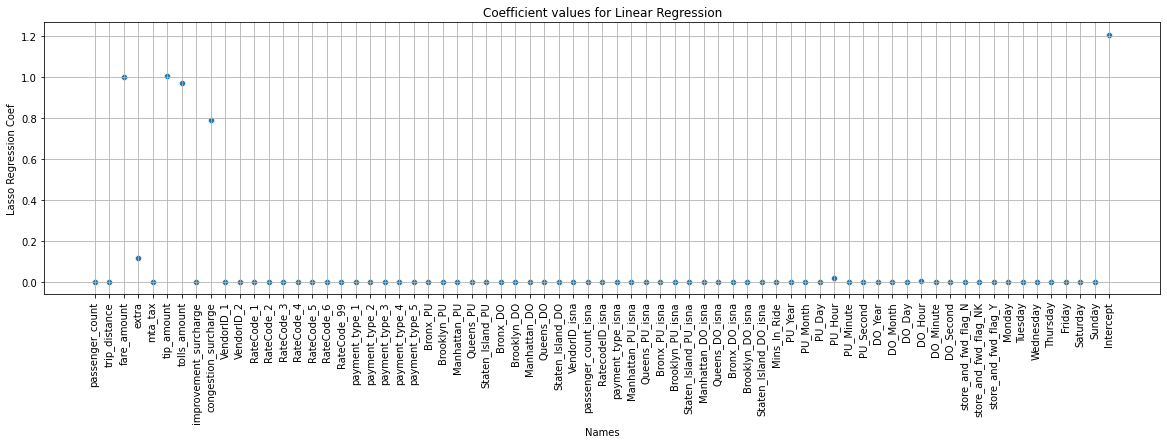

In [9]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x='Names', y='Lasso Regression Coef', data=current_coefs)
plt.title('Coefficient values for Linear Regression')
plt.grid(True)
plt.xticks(rotation=90)
plt.plot()

In [10]:
mean_squared_error(y_test, y_pred, squared=False)

421.26764521576223

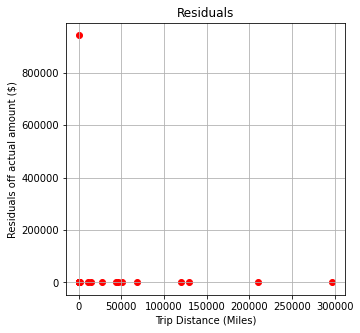

In [11]:
residuals = y_test - y_pred
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['trip_distance'], y=residuals, c='red')
# plt.loglog(X_test['trip_distance'], residuals)
plt.grid(True)
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Residuals off actual amount ($)')
plt.title('Residuals')
plt.show()

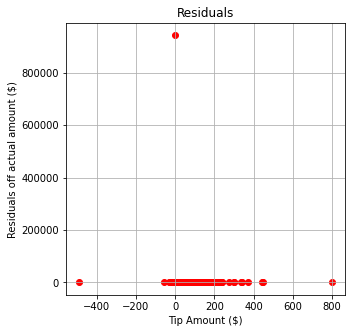

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['tip_amount'], y=residuals, c='red')
plt.grid(True)
plt.xlabel('Tip Amount ($)')
plt.ylabel('Residuals off actual amount ($)')
plt.title('Residuals')
plt.show()

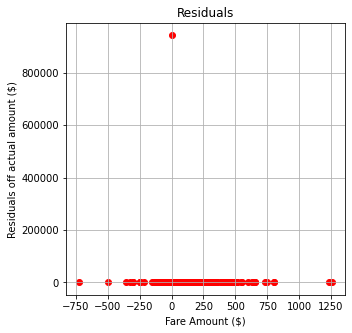

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['fare_amount'], y=residuals, c='red')
plt.grid(True)
plt.xlabel('Fare Amount ($)')
plt.ylabel('Residuals off actual amount ($)')
plt.title('Residuals')
plt.show()

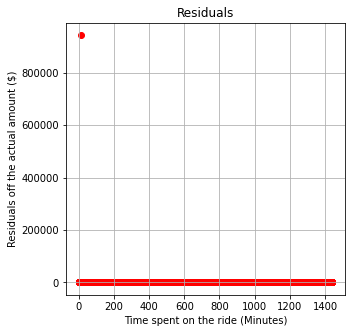

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=X_test['Mins_In_Ride'], y=residuals, c='red')
plt.grid(True)
plt.xlabel('Time spent on the ride (Minutes)')
plt.ylabel('Residuals off the actual amount ($)')
plt.title('Residuals')
plt.show()

In [20]:
# VendorID: A code indicating the TPEP provider that provided the record.
# 1= Creative Mobile Technologies, LLC; 2
# Years from 2021
# Months from January to December
# Days from 1 - 31 based on the month and leap year
# Hours of pick up from 9am to 8pm
# Hours of drop off from 9am to 8pm
# Minutes from 0 to 59
# The number of passengers from 0 to 5
# The trip distance from 1 to 50 miles
# Price rate code 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride
# Payment type A numeric code signifying how the passenger paid for the trip.
# 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip
# fare_amount is equal to time * distance
# Extra includes overnight (midnight - 5am) and rushhour charges (7am-9am & 5pm-8pm) include $0.50 and $1
# mta_tax is a $0.50 MTA_tax charge that is automatically triggered on the metered use
# tip_amount is the amount of tips that a passenger gave. Will range it from $0 to $10
# tolls_amount is how much toll chargers were made during the ride. ($5 increments)
# improvement_surcharge added a $0.30 when assessed trips at the flag drop
# Zone pickup and dropoff are the same as pickup location
# Borough_PU These were translated into dummy variables through one-hot encoding. 
# Need to find a way to generate appropriate values for the dummy variables

In [24]:
import datetime
def synth_data(vendID_1, vendID_2, pu_hour, pu_minute, pu_sec, do_hour, do_minute, do_second, passenger_count, trip_dist,
              rateID, paymenttype, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge,
              borough_pu, borough_do, dayofweek, PU_Year, PU_Month, PU_Day, DO_Year, DO_Month,
              DO_Day, congestion_surcharge, N):
    original_columns = ['passenger_count','trip_distance', 'RatecodeID', 'payment_type',
                    'fare_amount','extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                    'improvement_surcharge', 'Borough_PU', 'Borough_DO']
    # PU_Hour, PU_Minute, PU_Second
    pu_hour = pu_hour
    pu_minute = pu_minute
    pu_sec = pu_sec
    # DO_Hour, DO_Minute, DO_Second
    do_hour = do_hour
    do_minute = do_minute
    do_second = do_second
    # 3 passengers
    passenger_count = passenger_count
    # trip_distance at 50 miles
    trip_dist = trip_dist
    rateID = rateID
    # fare_amount a trip for an hour
            

    pu_time = '{}:{}:{}'.format(pu_hour, pu_minute, pu_sec)
    do_time = '{}:{}:{}'.format(do_hour, do_minute, do_second)
    
    if pu_sec < 10:
        pu_time = '{}:{}:0{}'.format(pu_hour, pu_minute, pu_sec)
    if do_second < 10:
        do_time = '{}:{}:0{}'.format(do_hour, do_minute, do_second)

    
    pu_time = datetime.datetime.strptime(pu_time, '%H:%M:%S')
    do_time = datetime.datetime.strptime(do_time, '%H:%M:%S')
    minsinride = ((do_time - pu_time).seconds / 60)
    
    fare_amount = trip_dist + minsinride
    # $1 for rush hours
    extra = extra
    # A trigger charges for mta_tax
    mta_tax = mta_tax
    # $3 tip
    tip_amount = tip_amount
    # tolls_amount = $25 worth of tolls. Each toll is roughly $5
    tolls_amount = tolls_amount
    # harder areas to reach get a $0.30 extra charges
    improvement_surcharge = improvement_surcharge
    # Same as pulocation
    list_of_data = [passenger_count, trip_dist, rateID, 
                    paymenttype, fare_amount, extra, mta_tax, tip_amount, tolls_amount,
                   improvement_surcharge, borough_pu, borough_do]
    new_data = {}
    for i in range(len(original_columns)):
        new_data[original_columns[i]] = list_of_data[i]

    rem = list(set(training_data.columns) - set(new_data.keys()))
    for col in rem:
        new_data[col] = 0
    new_data
    
    # Fill in appropriate values
    # It is a saturday
    new_data['VendorID_1'] = vendID_1
    new_data['VendorID_2'] = vendID_2
    new_data['Mins_In_Ride'] = minsinride
    new_data['dayofweek'] = dayofweek
    new_data['PU_Hour'] = pu_hour
    new_data['PU_Minute'] = pu_minute
    new_data['PU_Second'] = pu_sec
    new_data['PU_Year'] = PU_Year
    new_data['PU_Month'] = PU_Month
    new_data['PU_Day'] = PU_Day
    new_data['DO_Hour'] = do_hour
    new_data['DO_Minute'] = do_minute
    new_data['DO_Second'] = do_second
    new_data['DO_Year'] = DO_Year
    new_data['DO_Month'] = DO_Month
    new_data['DO_Day'] = DO_Day
    new_data['{}_PU'.format(borough_pu)] = 1
    new_data['{}_DO'.format(borough_do)] = 1
    new_data['congestion_surcharge'] = congestion_surcharge
    new_data['N'] = N
    # payment_type
    new_data['payment_type_{}'.format(paymenttype)]
    new_data['RateCode_{}'.format(rateID)]

    new_data.pop('total_amount')

    organized_data = {}
    for col in training_data.columns:
        if col == 'total_amount':
            continue
        organized_data[col] = new_data[col]
    organized_data

    newp_df = pd.DataFrame(organized_data, index=[0])
    new_y_pred = linreg.predict(newp_df)
    newp_df['predicted_amount'] = new_y_pred
    return newp_df

In [22]:
temp1 = pd.DataFrame({'x': [1]})
temp2 = pd.DataFrame({'x': [23]})
b = temp1.append(temp2)
b = b.reset_index()
b = b.drop(['index'], axis=1)
b

,x
0,1
1,23


Two people taking a taxi trip for 45 minutes during rush hour in Manhattan on June 15th, 2021 would have a predicted price ticket of about $58.

How can a taxi driver get an idea of what he will be making if he were to drive after work hours until 1am?


The idea is to find out how much a taxi driver could make when they are trying to driver after their 8 hou job.
* The hypothetical situation will generate some random values for tips.
* The idea is to study how time and distance can help the taxi driver get an estimate of how much they will make

In [34]:
import random
final_df = []
# From 6pm to 1am
after_hours = [18, 19, 20, 21, 22, 23, 0]
after_minutes = np.arange(1, 59, 10)
after_dists = np.arange(5, 21, 5)
after_tolls = np.arange(0, 15, 5)
for mins in after_minutes:
    for dis in after_dists:
        for tolls in after_tolls:
            after_vendid1 = random.randint(1, 2)
            after_vendid2 = 0
            if after_vendid1 == 0:
                after_vendid2 = 1
            pu_hr = random.randint(0, len(after_hours) - 1)
            do_hr = random.randint(pu_hr, len(after_hours) - 1)
            pu_hr = after_hours[pu_hr]
            do_hr = after_hours[do_hr]
            # minutes in intervals of 10
            after_do_mins = random.randint(mins, 59)
            # passenger count can be randomly chosen (up to 3 passengers)
            after_passengers = random.randint(1, 3)
            # rateID can be 2 for metro area rate charge
            after_rateid = 2
            # payment type can be randomly picked
            after_pay_type = random.randint(1, 5)
            # extra can be set to $1 for rush hour
            after_extra = 1
            # can be randomly chosen for whether there was an mta_tax charge
            after_mta_tax = random.randint(0, 1) / 2
            # random amount for tips
            after_tips = random.randint(1, 10)
            after_tolls = np.arange(0, 15, 5)
            # improvement surcharge is a $0.30
            after_improvement_surcharge = 0.30
            # This will pick a random borough
            boroughs_list = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten_Island']
            after_borough_pu = boroughs_list[random.randint(0, 4)]
            after_borough_do = boroughs_list[random.randint(0, 4)]
            # day of the week can also be picked randomly
            after_dayoftheweek = random.randint(1, 7)
            # Year can be set to 2021
            after_pu_year = 2021
            # can randomly pick values for month and day
            after_pu_month = random.randint(1, 13)
            after_pu_day = random.randint(1, 32)
            after_do_year = 2021
            after_do_month = after_pu_month
            after_do_day = after_pu_day
            # congestion_surcharge can be $0.50
            after_congestion_surcharge = 0.50
            # N can be set to 1
            after_N = 1
            final_df.append(synth_data(after_vendid1, after_vendid2, pu_hr, mins, 0, do_hr, after_do_mins,
                                       0, after_passengers, dis, after_rateid, after_pay_type,
                                       after_extra, after_mta_tax, after_tips, tolls, after_improvement_surcharge,
                                       after_borough_pu, after_borough_do, after_dayoftheweek,
                                       after_pu_year, after_pu_month, after_pu_day, after_do_year, 
                                       after_do_month, after_do_day, after_congestion_surcharge,
                                       after_N))


In [ ]:
df = pd.concat(final_df)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

In [ ]:
# synth_data(vendID, pu_hour, pu_minute, pu_sec, do_hour, do_minute, do_second, passenger_count, trip_dist,
#               rateID, paymenttype, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge,
#               borough_pu, borough_do, dayofweek, PU_Year, PU_Month, PU_Day, DO_Year, DO_Month,
#               DO_Day, congestion_surcharge, N):

In [ ]:
df.groupby('trip_distance').max()

Tested various hours during rush hour from 6pm to 1am.

Randomized minutes for each trips from 0 mins to 59 mins.

Tested out 4 different kinds of trip distances that ranged from 5miles to 20 miles.

Tested out different values for tolls that ranged from $5, $10, and $15.

The outcome appears to show that a person who wants to work during rush hours will averagly make the most money when they.

In these hypothetical scenarios, the model estimates that having the most miles on a trip won't always means you make the most money. Instead, time also plays a factor and so shorter distanced trips sometimes make more money. 
In the event when it took longer to finish a trip the model predicted a higher total amount. 

In [ ]:
# Scenario #2 where all values are the same except the day of the week.
# One is set to weekday and another to weekend
cols = training_data.columns
data = {}
for col in cols:
    data[col] = 0
data[]

In [32]:
weekday_amount = []
weekend_amount = []
for _ in range(10):
    after_vendid1 = random.randint(1, 2)
    after_vendid2 = 0
    if after_vendid1 == 0:
        after_vendid2 = 1
    pu_hr = random.randint(0, len(after_hours) - 1)
    do_hr = random.randint(pu_hr, len(after_hours) - 1)
    pu_hr = 18
    do_hr = 18
    after_pu_mins = random.randint(0, 59)
    # minutes in intervals of 10
    after_do_mins = random.randint(after_pu_mins, 59)
    # passenger count can be randomly chosen (up to 3 passengers)
    after_passengers = random.randint(1, 3)
    # rateID can be 2 for metro area rate charge
    after_rateid = 2
    # payment type can be randomly picked
    after_pay_type = random.randint(1, 5)
    # extra can be set to $1 for rush hour
    after_extra = 1
    # can be randomly chosen for whether there was an mta_tax charge
    after_mta_tax = random.randint(0, 1) / 2
    # random amount for tips
    after_tips = random.randint(1, 10)
    after_tolls = np.arange(1, 15, 5)
    # improvement surcharge is a $0.30
    after_improvement_surcharge = 0.30
    # This will pick a random borough
    boroughs_list = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten_Island']
    after_borough_pu = boroughs_list[random.randint(0, 4)]
    after_borough_do = boroughs_list[random.randint(0, 4)]
    # day of the week can also be picked randomly
    after_dayoftheweek = 5
    # Year can be set to 2021
    after_pu_year = 2021
    # can randomly pick values for month and day
    after_pu_month = random.randint(1, 13)
    after_pu_day = random.randint(1, 32)
    after_do_year = 2021
    after_do_month = after_pu_month
    after_do_day = after_pu_day
    # congestion_surcharge can be $0.50
    after_congestion_surcharge = 0.50
    # N can be set to 1
    after_N = 1
    after_dists = 10
    after_tolls = 3
    weekday_amount.append(synth_data(after_vendid1, after_vendid2, pu_hr, after_pu_mins, 0, do_hr, after_do_mins,
                                           0, after_passengers, after_dists, after_rateid, after_pay_type,
                                           after_extra, after_mta_tax, after_tips, after_tolls, after_improvement_surcharge,
                                           after_borough_pu, after_borough_do, after_dayoftheweek,
                                           after_pu_year, after_pu_month, after_pu_day, after_do_year, 
                                           after_do_month, after_do_day, after_congestion_surcharge,
                                           after_N)['predicted_amount'])
    weekend_amount.append(synth_data(after_vendid1, after_vendid2, pu_hr, after_pu_mins, 0, do_hr, after_do_mins,
                                       0, after_passengers, after_dists, after_rateid, after_pay_type,
                                       after_extra, after_mta_tax, after_tips, 0, after_improvement_surcharge,
                                       after_borough_pu, after_borough_do, after_dayoftheweek,
                                       after_pu_year, after_pu_month, after_pu_day, after_do_year, 
                                       after_do_month, after_do_day, after_congestion_surcharge,
                                       after_N)['predicted_amount'])
print(np.mean(weekday_amount))
np.mean(weekend_amount)

33.25144718787768


30.340565986446308

After creating new data that had the same feature values, except for the day of the week, the model predicted that it would make slightly more on weekdays during rush hour. This predicted amount appeared to be slightly greater on data with weekdays than on weekends.

In [ ]:
# This will check the different hours with tolls and no tolls

    weekday_amount = []
    weekend_amount = []
    for _ in range(10):
        after_vendid1 = random.randint(1, 2)
        after_vendid2 = 0
        if after_vendid1 == 0:
            after_vendid2 = 1
        pu_hr = random.randint(0, len(after_hours) - 1)
        do_hr = random.randint(pu_hr, len(after_hours) - 1)
        pu_hr = 18
        do_hr = 18
        after_pu_mins = random.randint(0, 59)
        # minutes in intervals of 10
        after_do_mins = random.randint(after_pu_mins, 59)
        # passenger count can be randomly chosen (up to 3 passengers)
        after_passengers = random.randint(1, 3)
        # rateID can be 2 for metro area rate charge
        after_rateid = 2
        # payment type can be randomly picked
        after_pay_type = random.randint(1, 5)
        # extra can be set to $1 for rush hour
        after_extra = 1
        # can be randomly chosen for whether there was an mta_tax charge
        after_mta_tax = random.randint(0, 1) / 2
        # random amount for tips
        after_tips = random.randint(1, 10)
        after_tolls = np.arange(1, 15, 5)
        # improvement surcharge is a $0.30
        after_improvement_surcharge = 0.30
        # This will pick a random borough
        boroughs_list = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten_Island']
        after_borough_pu = boroughs_list[random.randint(0, 4)]
        after_borough_do = boroughs_list[random.randint(0, 4)]
        # day of the week can also be picked randomly
        after_dayoftheweek = 5
        # Year can be set to 2021
        after_pu_year = 2021
        # can randomly pick values for month and day
        after_pu_month = random.randint(1, 13)
        after_pu_day = random.randint(1, 32)
        after_do_year = 2021
        after_do_month = after_pu_month
        after_do_day = after_pu_day
        # congestion_surcharge can be $0.50
        after_congestion_surcharge = 0.50
        # N can be set to 1
        after_N = 1
        after_dists = 10
        after_tolls = 3
        weekday_amount.append(synth_data(after_vendid1, after_vendid2, pu_hr, after_pu_mins, 0, do_hr, after_do_mins,
                                               0, after_passengers, after_dists, after_rateid, after_pay_type,
                                               after_extra, after_mta_tax, after_tips, after_tolls, after_improvement_surcharge,
                                               after_borough_pu, after_borough_do, after_dayoftheweek,
                                               after_pu_year, after_pu_month, after_pu_day, after_do_year, 
                                               after_do_month, after_do_day, after_congestion_surcharge,
                                               after_N)['predicted_amount'])
        weekend_amount.append(synth_data(after_vendid1, after_vendid2, pu_hr, after_pu_mins, 0, do_hr, after_do_mins,
                                           0, after_passengers, after_dists, after_rateid, after_pay_type,
                                           after_extra, after_mta_tax, after_tips, 0, after_improvement_surcharge,
                                           after_borough_pu, after_borough_do, after_dayoftheweek,
                                           after_pu_year, after_pu_month, after_pu_day, after_do_year, 
                                           after_do_month, after_do_day, after_congestion_surcharge,
                                           after_N)['predicted_amount'])
    print(np.mean(weekday_amount))
    np.mean(weekend_amount)